# Working with NWB in Python 

In [3]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from pynwb import NWBHDF5IO

## Reading our NWB file

To access the data in our nwb file we must read the file. This is done in two steps:
- assign our file as an `NWBHDF5IO` object
- read our file 

The first step is done using the `NWBHDF5IO` class to create our `NWBHDF5IO` object and map our file to HDF5 format. Once we have done this, we can use the `read()` method to return our nwb file. For more information on how to read NWB files, please visit the *Reading data from an NWB file* section from the <a href = 'https://pynwb.readthedocs.io/en/latest/tutorials/general/file.html'> NWB Basics Tutorial</a>. For more information on the `NWBHDF5IO` class, please visit the <a href = 'https://pynwb.readthedocs.io/en/latest/pynwb.html#pynwb.NWBHDF5IO'> original documentation</a>.

In [30]:
# first read the file 
io = NWBHDF5IO('000006/sub-anm369962/sub-anm369962_ses-20170310.nwb', 'r')
nwb_file = io.read()
print(type(nwb_file))

<class 'pynwb.file.NWBFile'>


## File Hierarchy: Groups, Datasets, and Attributes

The NWB file is composed of various Groups, Datasets, and Attributes. The data/datasets and cooresponding meta-data are encapsulated within these Groups. The `fields` attribute returns a dictionary contiaining the metadata of the Groups of our nwb file. The dictionary `keys` are the various Groups within the file which we will use to access our datasets.

In [5]:
# nwb_file.fields

In [6]:
# Get the Groups for the nwb file 
nwb_fields = nwb_file.fields
print(nwb_fields.keys())

dict_keys(['acquisition', 'analysis', 'scratch', 'stimulus', 'stimulus_template', 'processing', 'devices', 'electrode_groups', 'imaging_planes', 'icephys_electrodes', 'ogen_sites', 'intervals', 'lab_meta_data', 'session_description', 'identifier', 'session_start_time', 'timestamps_reference_time', 'file_create_date', 'keywords', 'epoch_tags', 'electrodes', 'subject', 'trials', 'units', 'experiment_description', 'institution', 'experimenter', 'related_publications'])


Each NWB file will have information on where the experiment was conducted, what lab conducted the experiment, as well as a description of the experiment. This information can be accessed using `institution`, `lab`, and `description`, attributes on our `nwb_file`, respectively. 

In [7]:
# Get Meta-Data from NWB file 
print('The experiment within this NWB file was conducted at {} in the lab of {}. The experiment is detailed as follows: {}'.format(nwb_file.institution, nwb_file.lab, nwb_file.experiment_description))

The experiment within this NWB file was conducted at Janelia Research Campus in the lab of None. The experiment is detailed as follows: Extracellular electrophysiology recordings performed on mouse anterior lateral motor cortex (ALM) in delay response task. Neural activity from two neuron populations, pyramidal track upper and lower, were characterized, in relation to movement execution.


We can access metadata from each group in our `nwb_file` with the following syntax: `nwb_file.group`. This is no different than executing a method and/or attribute. The `acquisition` group contains datasets of acquisition data. We can look at the look at the `description` field in the metadata to understand what each dataset in the group contains. 

In [14]:
# example showing how to return meta data from groups in nwb file 
# 'acquisition' is the first group in our file 
nwb_file.acquisition

{'lick_times': lick_times pynwb.behavior.BehavioralEvents at 0x140609270652880
 Fields:
   time_series: {
     lick_left_times <class 'pynwb.base.TimeSeries'>,
     lick_right_times <class 'pynwb.base.TimeSeries'>
   }}

In this file, the acquisition group contains two different dataets, `lickPiezo` and `wheel_position`. To access the actual data array of these datasets we must first subset our dataset of interest from the group. We can then use `data[:]` to return our actual data array. 

In [18]:
# select our dataset of interest 
sub_group = 'lick_times'
lick_times = nwb_file.acquisition[sub_group]
lick_left_ds = lick_times['lick_left_times']

# return first 20 values in data array 
lick_left_times_data_array = lick_left_ds.data[:10]

print(lick_left_times_data_array)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


The `processing` group in our `nwb_file` contains all of our processed data for scientific analysis. Within the procesing group there are mulitple subgroups that belong to the `behavior` module. `BehavioralEpochs`, `BehavioralEvents`, `BehavioralEvents`, and `PupilTracking` are seperate groups encapsulated within `behavior` and contain their own datasets. 

In [19]:
# return meta data for prcessing group
nwb_file.processing

{}

If we subset `PupilTracking` from `behavior` we can see that it contains two datasets. We can do as we did before and subset our dataset of interst and return the actual data array by executing `data[:]`.

In [ ]:
# assign behavior group to variable 
behavior = nwb_file.processing['behavior']

# subset PupilTracking group from behavior group 
pupil_tracking = behavior['PupilTracking']
print(pupil_tracking)

In [ ]:
# subset the eye_xy_positions dataset
eye_xy_positions = pupil_tracking['eye_xy_positions']
print(eye_xy_positions)

# return firsy 10 entires in actual data array
print('\n Eye (x,y) positions:')
print(eye_xy_positions.data[:10])

The `intervals` Group contains datasets from trials of our experiment, sub-experiments that were conducted, and/or epochs. For the example below, we will look into the `trials` dataset. You can return the `trials` data as a dataframe by using the `to_dataframe` method.

In [60]:
# Select the group of interest 
intervals = nwb_file.intervals

# Subset the dataset from the group and assign it as a dataframe
interval_trials_df = intervals['trials'].to_dataframe()
interval_trials_df.head()

,start_time,stop_time,type,response,stim_present,is_good,cue_start_time,pole_in_time,pole_out_time
id,,,,,,,,,
1,323.171,NaN,lick right,early lick,0,1,7.49698,3.93949,5.12748
2,329.570,NaN,lick right,early lick,0,1,11.81280,4.94181,5.94198
3,335.971,NaN,lick right,incorrect,0,1,6.62964,4.12915,5.12931
4,342.371,NaN,lick right,incorrect,0,1,6.41964,3.91915,4.91931
5,348.289,NaN,lick right,incorrect,0,1,12.66990,10.16930,11.16950


The `description` attribute provides a short description on each column of the dataframe. 

In [ ]:
print(intervals['trials']['response_choice'].description)

For more information on all the different Groups and hierarchal structure of an NWB file, please visit the <a href = 'https://nwb-schema.readthedocs.io/en/latest/format.html#nwb-n-file'> NWB:N file section</a> of the NWB Format documentation. For a list of all the attributes and methods for a `pynwb.file.NWBfile` obeject, please visit the <a href = 'https://pynwb.readthedocs.io/en/stable/pynwb.file.html'> module documentation</a>.

## Possible Analyses 

In [47]:
lick_right_ds = lick_times['lick_right_times']
lick_right_ds

lick_right_times pynwb.base.TimeSeries at 0x140609270732048
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1511,), type "<f8">
  description: no description
  interval: 1
  resolution: 0.0
  timestamps: <HDF5 dataset "timestamps": shape (1511,), type "<f8">
  timestamps_unit: seconds
  unit: a.u.

In [43]:
lick_left_ds

lick_left_times pynwb.base.TimeSeries at 0x140609270617808
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1379,), type "<f8">
  description: no description
  interval: 1
  resolution: 0.0
  timestamps: <HDF5 dataset "timestamps": shape (1379,), type "<f8">
  timestamps_unit: seconds
  unit: a.u.

In [37]:
units = nwb_file.units
units['spike_times'].description

"Index for VectorData 'spike_times'"

In [50]:
# nwb_file
units_df = nwb_file.units.to_dataframe()
units_df.loc[1, 'spike_times']

array([ 933.873288,  948.277471,  950.535711, ..., 2087.87896 ,
       2088.7114  , 2088.98616 ])

In [52]:
units_df

,depth,quality,cell_type,spike_times,electrodes
id,,,,,
1,665.0,Poor,unidentified,"[933.873288, 948.2774710000008, 950.5357110000...",x y z imp \ id ...
2,665.0,Fair,unidentified,"[329.95417899999956, 330.01945899999953, 330.0...",x y z imp \ id ...
3,715.0,,unidentified,"[329.94165899999956, 329.9998989999996, 330.00...",x y z imp \ id ...
4,715.0,[],unidentified,"[329.93145899999956, 330.7492189999995, 330.77...",x y z imp \ id ...
5,715.0,Fair,unidentified,"[331.09961899999956, 332.14505899999955, 333.3...",x y z imp \ id ...
...,...,...,...,...,...
1001,840.0,Excellent,PTlower,"[330.0389389999996, 330.46297899999956, 330.65...",x y z imp \ id ...
1002,890.0,Excellent,PTlower,"[330.47641899999957, 331.24353899999954, 331.3...",x y z imp \ id ...
1003,865.0,Good,PTlower,"[330.43165899999957, 330.43701899999957, 330.4...",x y z imp \ id ...


In [77]:
(units_df.loc[1,'spike_times'])

array([ 933.873288,  948.277471,  950.535711, ..., 2087.87896 ,
       2088.7114  , 2088.98616 ])

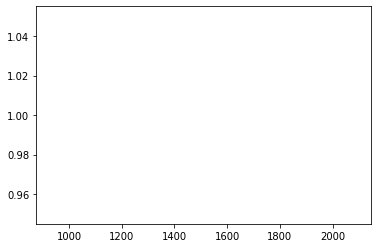

In [83]:
# test cell 
first_neuron = units_df.loc[1,'spike_times']
counter = 0 

for spk in first_neuron:
    spike_time = first_neuron[counter]
    y_unit = np.ones(1)
    plt.plot(spike_time, y_unit)
    counter +=1

plt.show()

In [42]:
nwb_file.experiment_description

'Extracellular electrophysiology recordings performed on mouse anterior lateral motor cortex (ALM) in delay response task. Neural activity from two neuron populations, pyramidal track upper and lower, were characterized, in relation to movement execution.'

In [21]:
# test cell
stimulus_dict = nwb_file.stimulus 
for key in stimulus_dict:
    print(key +':')
    print(stimulus_dict[key].description)
    print('\n')

In [53]:
electrode_groups = nwb_file.electrode_groups

for key in electrode_groups:
    print(key + ':')
    print(electrode_groups[key].description)
    print(electrode_groups[key].location)
    print('\n')

H-129: 64:
N/A
brain_region: ALM; brain_subregion: N/A; cortical_layer: 5; hemisphere: right; brain_location_full_name: N/A




In [54]:
# electrode positions 
electrodes = nwb_file.electrodes
electrodes.to_dataframe().head()

,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
1,0.0,0.0,0.0,-1.0,brain_region: ALM; brain_subregion: N/A; corti...,Bandpass filtered 300-6K Hz,H-129: 64 pynwb.ecephys.ElectrodeGroup at 0x14...,H-129: 64
2,0.0,0.0,0.0,-1.0,brain_region: ALM; brain_subregion: N/A; corti...,Bandpass filtered 300-6K Hz,H-129: 64 pynwb.ecephys.ElectrodeGroup at 0x14...,H-129: 64
3,0.0,0.0,0.0,-1.0,brain_region: ALM; brain_subregion: N/A; corti...,Bandpass filtered 300-6K Hz,H-129: 64 pynwb.ecephys.ElectrodeGroup at 0x14...,H-129: 64
4,0.0,0.0,0.0,-1.0,brain_region: ALM; brain_subregion: N/A; corti...,Bandpass filtered 300-6K Hz,H-129: 64 pynwb.ecephys.ElectrodeGroup at 0x14...,H-129: 64
5,0.0,0.0,0.0,-1.0,brain_region: ALM; brain_subregion: N/A; corti...,Bandpass filtered 300-6K Hz,H-129: 64 pynwb.ecephys.ElectrodeGroup at 0x14...,H-129: 64


In [55]:
# description of each column in electrodes 
for col in electrodes.to_dataframe():
    print(col + ':')
    print(electrodes[col].description)
    print('\n')

x:
the x coordinate of the channel location


y:
the y coordinate of the channel location


z:
the z coordinate of the channel location


imp:
the impedance of the channel


location:
the location of channel within the subject e.g. brain region


filtering:
description of hardware filtering


group:
a reference to the ElectrodeGroup this electrode is a part of


group_name:
the name of the ElectrodeGroup this electrode is a part of




In [56]:
# all electrode locations 
electrode_df = electrodes.to_dataframe()
print(electrode_df['location'].unique())

['brain_region: ALM; brain_subregion: N/A; cortical_layer: 5; hemisphere: right; brain_location_full_name: N/A']


In [57]:
# test cell
for col in intervals['trials'].to_dataframe():
    print(col +':')
    print(intervals['trials'][col].description)
    print('\n')

NameError: name 'intervals' is not defined